In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:
df = pd.read_csv('registered_people_n_streets.csv')
df = df[['GIMIMO_METAI','GIMIMO_VALSTYBE','LYTIS','SEIMOS_PADETIS','KIEK_TURI_VAIKU','SENIUNIJA','GATVE',]]
df['Amzius'] = 2019 - df['GIMIMO_METAI']

In [3]:
df.head(10)

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,Amzius
0,1966,LTU,M,NaN,0,Šnipiškės,Kalvarijų g.,53
1,2010,LTU,M,NaN,0,Pašilaičiai,Gabijos g.,9
2,1988,LTU,V,NaN,0,Fabijoniškės,Mykolo Lietuvio g.,31
3,1990,LTU,V,NaN,0,Pilaitė,Tolminkiemio g.,29
4,1975,LTU,V,I,1,Naujamiestis,Švitrigailos g.,44
5,1984,LTU,M,V,2,Paneriai,Antano Gudaičio g.,35
6,1979,LTU,V,V,2,Lazdynai,M. Mironaitės g.,40
7,1967,LTU,V,V,2,Senamiestis,Kreivasis skg.,52
8,2015,LTU,V,NaN,0,Lazdynai,Žaibo g.,4
9,1951,BLR,M,I,0,Naujininkai,Brolių g.,68


In [4]:
df.describe()

,GIMIMO_METAI,KIEK_TURI_VAIKU,Amzius
count,576736.000000,576736.000000,576736.000000
mean,1977.924473,0.355686,41.075527
std,22.978057,0.729552,22.978057
min,1909.000000,0.000000,0.000000
25%,1960.000000,0.000000,24.000000
50%,1979.000000,0.000000,40.000000
75%,1995.000000,0.000000,59.000000
max,2019.000000,12.000000,110.000000


### Questions to data?
1. What is the ratio/quantities Man to Woman?+
b. Average years?

2. What are the age's of citizens?+
b. Top 10 oldest people born in?+


3. Married, Single, Divorced or Unkown? +
b. Average years? 
c. Average kids?



4. Numbers of kids? + 
a. Where families with 4+ kids live rajonas, gatves? +
b. what are their births years? + 
c. What natonalities are they? + 



5. Most populated areas, counts? +
a. Who lives in biggest areas, peoples age group?



6. Most populate streets, counts? + 



7. Countries Born? +
a What are ages of BLR, RUS, UKR? 
b What are their family status, Married, Not?
c Do they have kids?


8. What is the average population age? Are we city of young or old people?

# Man vs Woman

In [5]:
df['LYTIS'].value_counts()

M    311654
V    265081
v         1
Name: LYTIS, dtype: int64

In [6]:
df['LYTIS'].unique()

array(['M', 'V', 'v'], dtype=object)

In [7]:
df['LYTIS'] = df['LYTIS'].replace({'v': 'V',})

In [8]:
df['LYTIS'].unique()

array(['M', 'V'], dtype=object)

In [9]:
df['LYTIS'].value_counts()

M    311654
V    265082
Name: LYTIS, dtype: int64

In [10]:
df['LYTIS'] = df['LYTIS'].replace({'V': 'Vyras', 'M': 'Moteris', })

Text(0.5, 1.0, 'Gyventojai pagal Lytį')

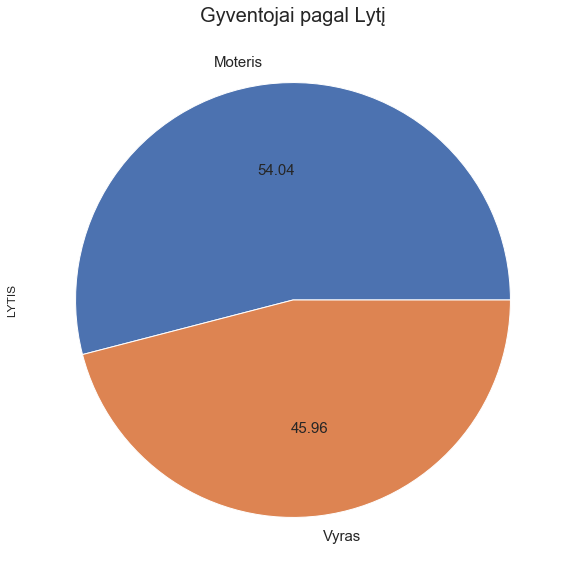

In [11]:
plt.figure(figsize=(20,10))
df['LYTIS'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Gyventojai pagal Lytį", fontsize=20, )
#plt.gca().set_aspect('equal')

# Married, Single, Divorced or Unkown?

In [12]:
len(df['SEIMOS_PADETIS'])

576736

In [13]:
df['SEIMOS_PADETIS'].unique()

array([nan, 'I', 'V', 'N'], dtype=object)

In [14]:
df['SEIMOS_PADETIS'].value_counts()

V    241030
I     62707
N     38999
Name: SEIMOS_PADETIS, dtype: int64

In [15]:
#No data
count_nan = len(df['SEIMOS_PADETIS']) - df['SEIMOS_PADETIS'].count()
count_nan

234000

In [16]:
df['SEIMOS_PADETIS'] = df['SEIMOS_PADETIS'].fillna('Nezinoma')
df.head()

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,Amzius
0,1966,LTU,Moteris,Nezinoma,0,Šnipiškės,Kalvarijų g.,53
1,2010,LTU,Moteris,Nezinoma,0,Pašilaičiai,Gabijos g.,9
2,1988,LTU,Vyras,Nezinoma,0,Fabijoniškės,Mykolo Lietuvio g.,31
3,1990,LTU,Vyras,Nezinoma,0,Pilaitė,Tolminkiemio g.,29
4,1975,LTU,Vyras,I,1,Naujamiestis,Švitrigailos g.,44


In [17]:
df['SEIMOS_PADETIS'] = df['SEIMOS_PADETIS'].replace({'V': 'Vedes', 'I': 'Išsiskyres', 'N': 'Nevedes',})

Text(0.5, 1.0, 'Vilniaus Gyventojai pagal šeimos padėtį')

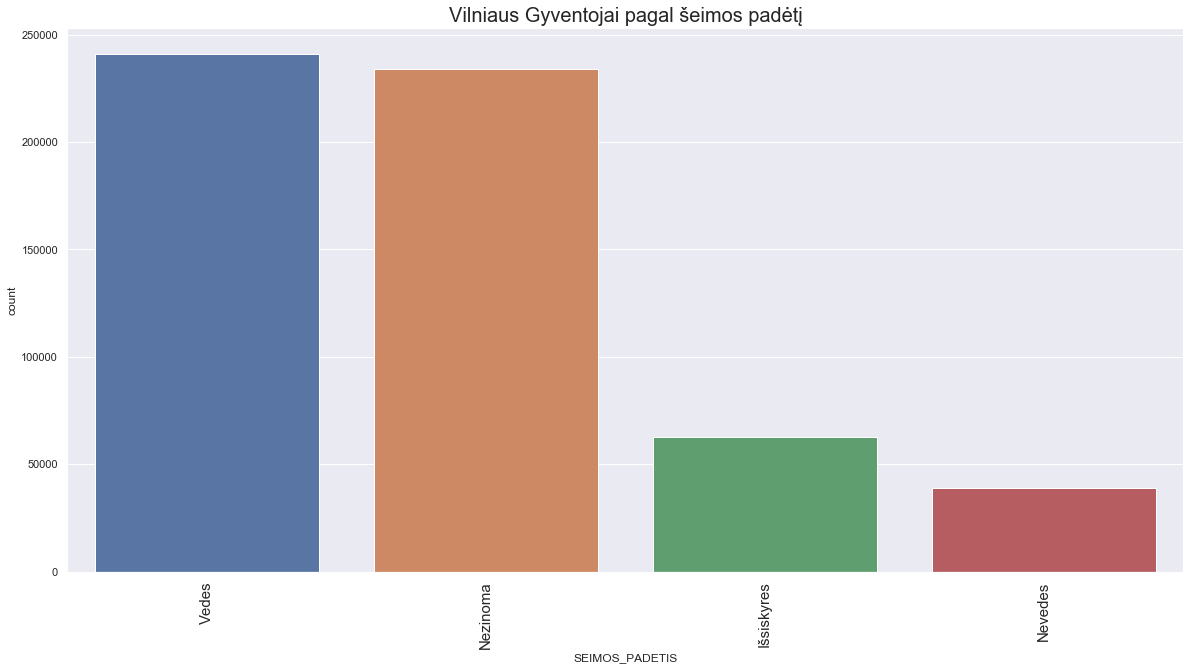

In [18]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='SEIMOS_PADETIS', data=df,order=df['SEIMOS_PADETIS'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15);
ax.set_title("Vilniaus Gyventojai pagal šeimos padėtį", fontsize=20)

# Age related questions?

In [19]:
df['GIMIMO_METAI'].describe()

count    576736.000000
mean       1977.924473
std          22.978057
min        1909.000000
25%        1960.000000
50%        1979.000000
75%        1995.000000
max        2019.000000
Name: GIMIMO_METAI, dtype: float64

In [20]:
df['GIMIMO_METAI'].value_counts()

1986    10823
1984    10726
1983    10672
1985    10659
1987    10182
        ...  
1914        2
1913        2
1909        2
1912        1
1911        1
Name: GIMIMO_METAI, Length: 110, dtype: int64

Text(0.5, 1.0, 'Gyventojų kiekis pagal Gim.Metus')

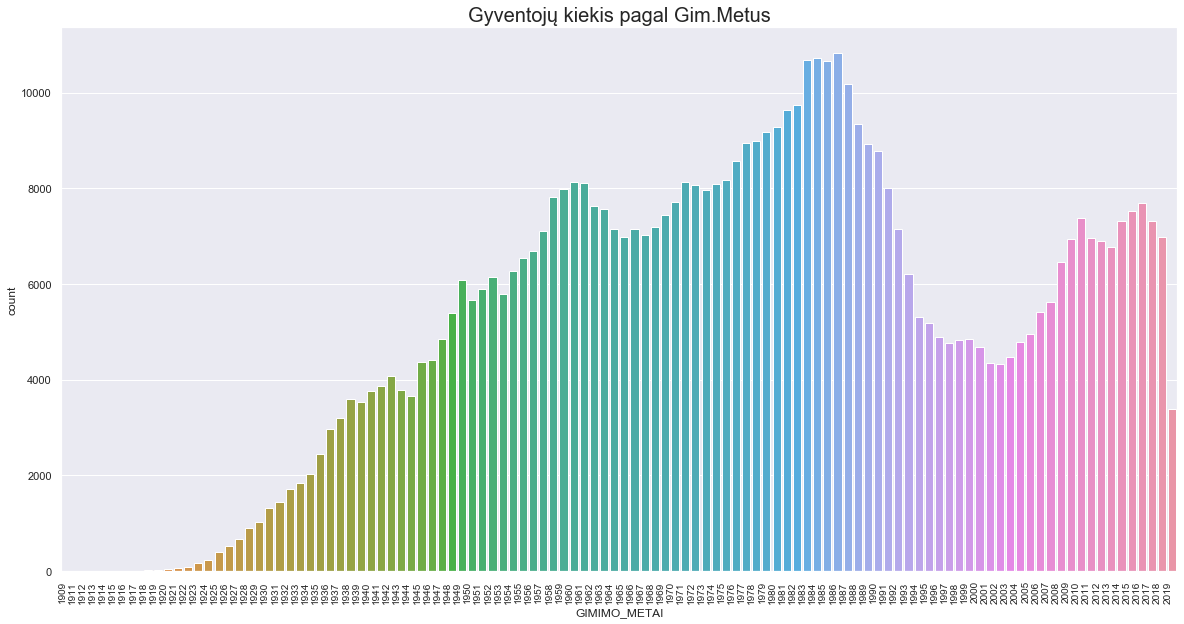

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='GIMIMO_METAI',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
ax.set_title('Gyventojų kiekis pagal Gim.Metus', fontsize=20)

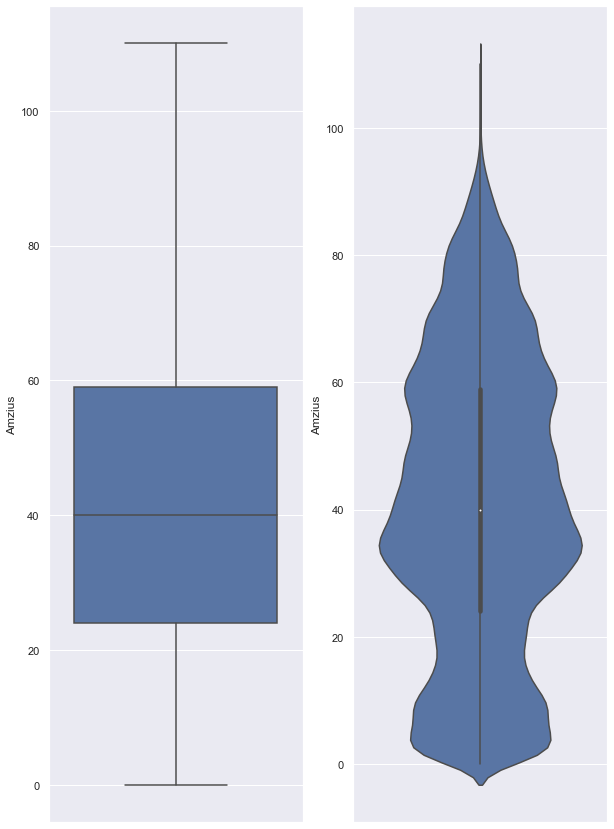

In [22]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='Amzius', data=df, ) #showfliers=False
plt.subplot(1,2,2)
sns.violinplot(y='Amzius', data=df, ) #showfliers=False

In [23]:
#top 10 oldest people
df['GIMIMO_METAI'].nsmallest(15)

220541    1909
508631    1909
404704    1911
209189    1912
128075    1913
408566    1913
13001     1914
267764    1914
168873    1915
487076    1915
60799     1916
90974     1916
376956    1916
450211    1916
506782    1916
Name: GIMIMO_METAI, dtype: int64

# Citizen by nationality

In [24]:
gyventojai = df['GIMIMO_VALSTYBE'].value_counts().head(10)
gyventojai

LTU    510016
BLR     23839
RUS     19277
UKR      8576
GBR      1978
KAZ      1447
LVA      1317
DEU       881
POL       742
USA       563
Name: GIMIMO_VALSTYBE, dtype: int64

In [25]:
df['GIMIMO_VALSTYBE'].unique()

array(['LTU', 'BLR', 'LUX', 'RUS', 'IRN', 'JOR', 'UKR', 'IRL', 'KAZ',
       'GBR', 'THA', 'DEU', 'LVA', 'ARM', 'BEL', 'IND', 'TJK', 'KHM',
       'EST', 'POL', 'USA', 'GHA', 'ARE', 'CHN', 'DNK', 'COL', 'GRC',
       'BGR', 'RWA', 'FRA', 'VNM', 'SYR', 'GEO', 'AZE', 'EGY', 'KGZ',
       'TUR', 'AUS', 'ITA', 'ECU', 'JPN', 'UZB', 'BRA', 'NGA', 'PAK',
       'AFG', 'KOR', 'TKM', 'CAN', 'ESP', 'MDA', 'NLD', 'CHE', 'FIN',
       'CMR', 'AUT', 'SRB', 'CHL', 'MDG', 'SWE', 'AGO', 'VEN', 'CYP',
       'PHL', 'NOR', 'PRK', 'ALB', 'KWT', 'HUN', 'ISR', 'TUN', 'SAU',
       'ETH', 'CZE', 'SVK', 'LBN', 'MAR', 'MYS', 'ARG', 'OMN', 'MEX',
       'PRT', 'ISL', 'ROU', 'CUB', 'MLT', 'IRQ', 'PER', 'MNG', 'COD',
       'BGD', 'ZAF', 'MKD', 'KEN', 'URY', 'HRV', 'BIH', 'TON', 'IDN',
       'MOZ', 'SGP', 'NPL', 'HKG', 'PSE', 'CIV', 'SVN', 'HND', 'LKA',
       'UGA', 'GIN', 'YUG', 'DZA', 'ROM', 'LBR', 'ERI', 'NAM', 'BHR',
       'CRI', 'NZL', 'GNB', 'MNE', 'MUS', 'LBY', 'ZWE', 'COM', 'SDN',
       'PAN', 'PRY',

Text(0.5, 1.0, 'Gyventojų kiekis pagal tautybe')

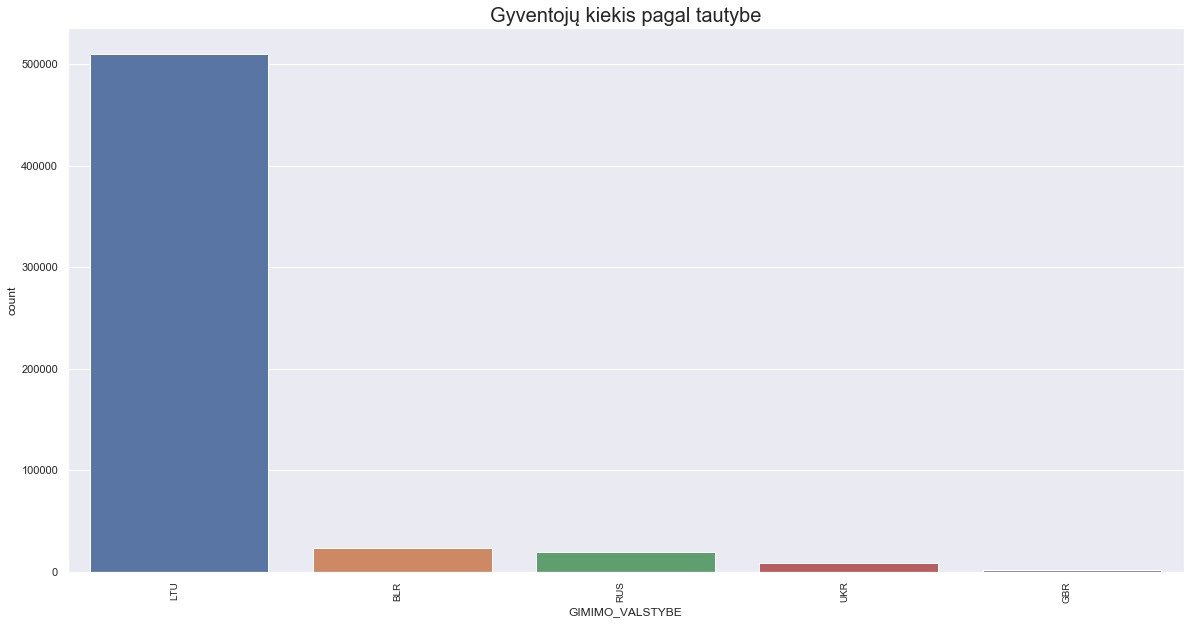

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='GIMIMO_VALSTYBE',data=df, order=df.GIMIMO_VALSTYBE.value_counts().iloc[:5].index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
ax.set_title('Gyventojų kiekis pagal tautybe', fontsize=20)

Text(0.5, 1.0, 'Gyventojai pagal tautybe')

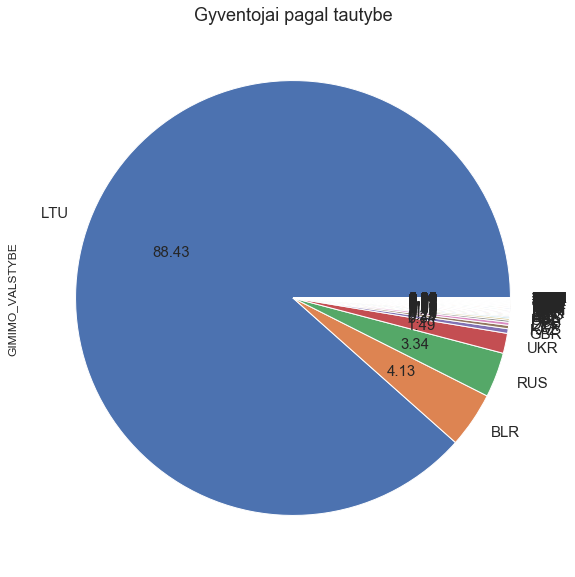

In [27]:
plt.figure(figsize=(20,10))
df['GIMIMO_VALSTYBE'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Gyventojai pagal tautybe", fontsize=18 )
#plt.gca().set_aspect('equal')



# Citizens by number of children

In [28]:
df['KIEK_TURI_VAIKU'].value_counts()

0     444509
1      71356
2      50615
3       8889
4       1090
5        193
6         55
7         17
8          6
12         2
10         2
9          2
Name: KIEK_TURI_VAIKU, dtype: int64

Text(0.5, 1.0, 'Pagal vaiku skaiciu')

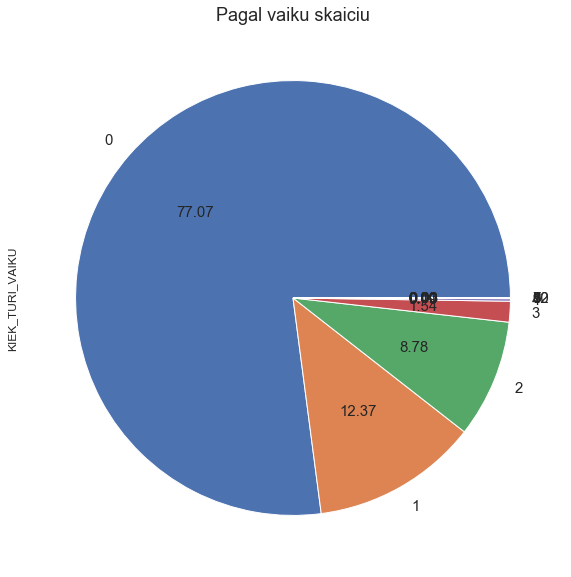

In [29]:
plt.figure(figsize=(20,10))
df['KIEK_TURI_VAIKU'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Pagal vaiku skaiciu", fontsize=18 )
#plt.gca().set_aspect('equal')

### Gyventoju be vaiku skaicius atrodo labai didelis, kodel? Kas jie?

In [40]:
bevaiku = df[df['KIEK_TURI_VAIKU'] < 1]
bevaiku.head()

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,Amzius
0,1966,LTU,Moteris,Nezinoma,0,Šnipiškės,Kalvarijų g.,53
1,2010,LTU,Moteris,Nezinoma,0,Pašilaičiai,Gabijos g.,9
2,1988,LTU,Vyras,Nezinoma,0,Fabijoniškės,Mykolo Lietuvio g.,31
3,1990,LTU,Vyras,Nezinoma,0,Pilaitė,Tolminkiemio g.,29
8,2015,LTU,Vyras,Nezinoma,0,Lazdynai,Žaibo g.,4


In [41]:
bevaiku.count()

GIMIMO_METAI       444509
GIMIMO_VALSTYBE    444509
LYTIS              444509
SEIMOS_PADETIS     444509
KIEK_TURI_VAIKU    444509
SENIUNIJA          438935
GATVE              438935
Amzius             444509
dtype: int64

In [43]:
suvaikais = df[df['KIEK_TURI_VAIKU'] > 0]
suvaikais.head()

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,Amzius
4,1975,LTU,Vyras,Išsiskyres,1,Naujamiestis,Švitrigailos g.,44
5,1984,LTU,Moteris,Vedes,2,Paneriai,Antano Gudaičio g.,35
6,1979,LTU,Vyras,Vedes,2,Lazdynai,M. Mironaitės g.,40
7,1967,LTU,Vyras,Vedes,2,Senamiestis,Kreivasis skg.,52
23,1973,LTU,Moteris,Išsiskyres,1,Naujamiestis,Algirdo g.,46


In [63]:
suvaikais.count()

GIMIMO_METAI       132227
GIMIMO_VALSTYBE    132227
LYTIS              132227
SEIMOS_PADETIS     132227
KIEK_TURI_VAIKU    132227
SENIUNIJA          130709
GATVE              130709
Amzius             132227
dtype: int64

Text(0.5, 1.0, 'Gyventojai turintys vaiku')

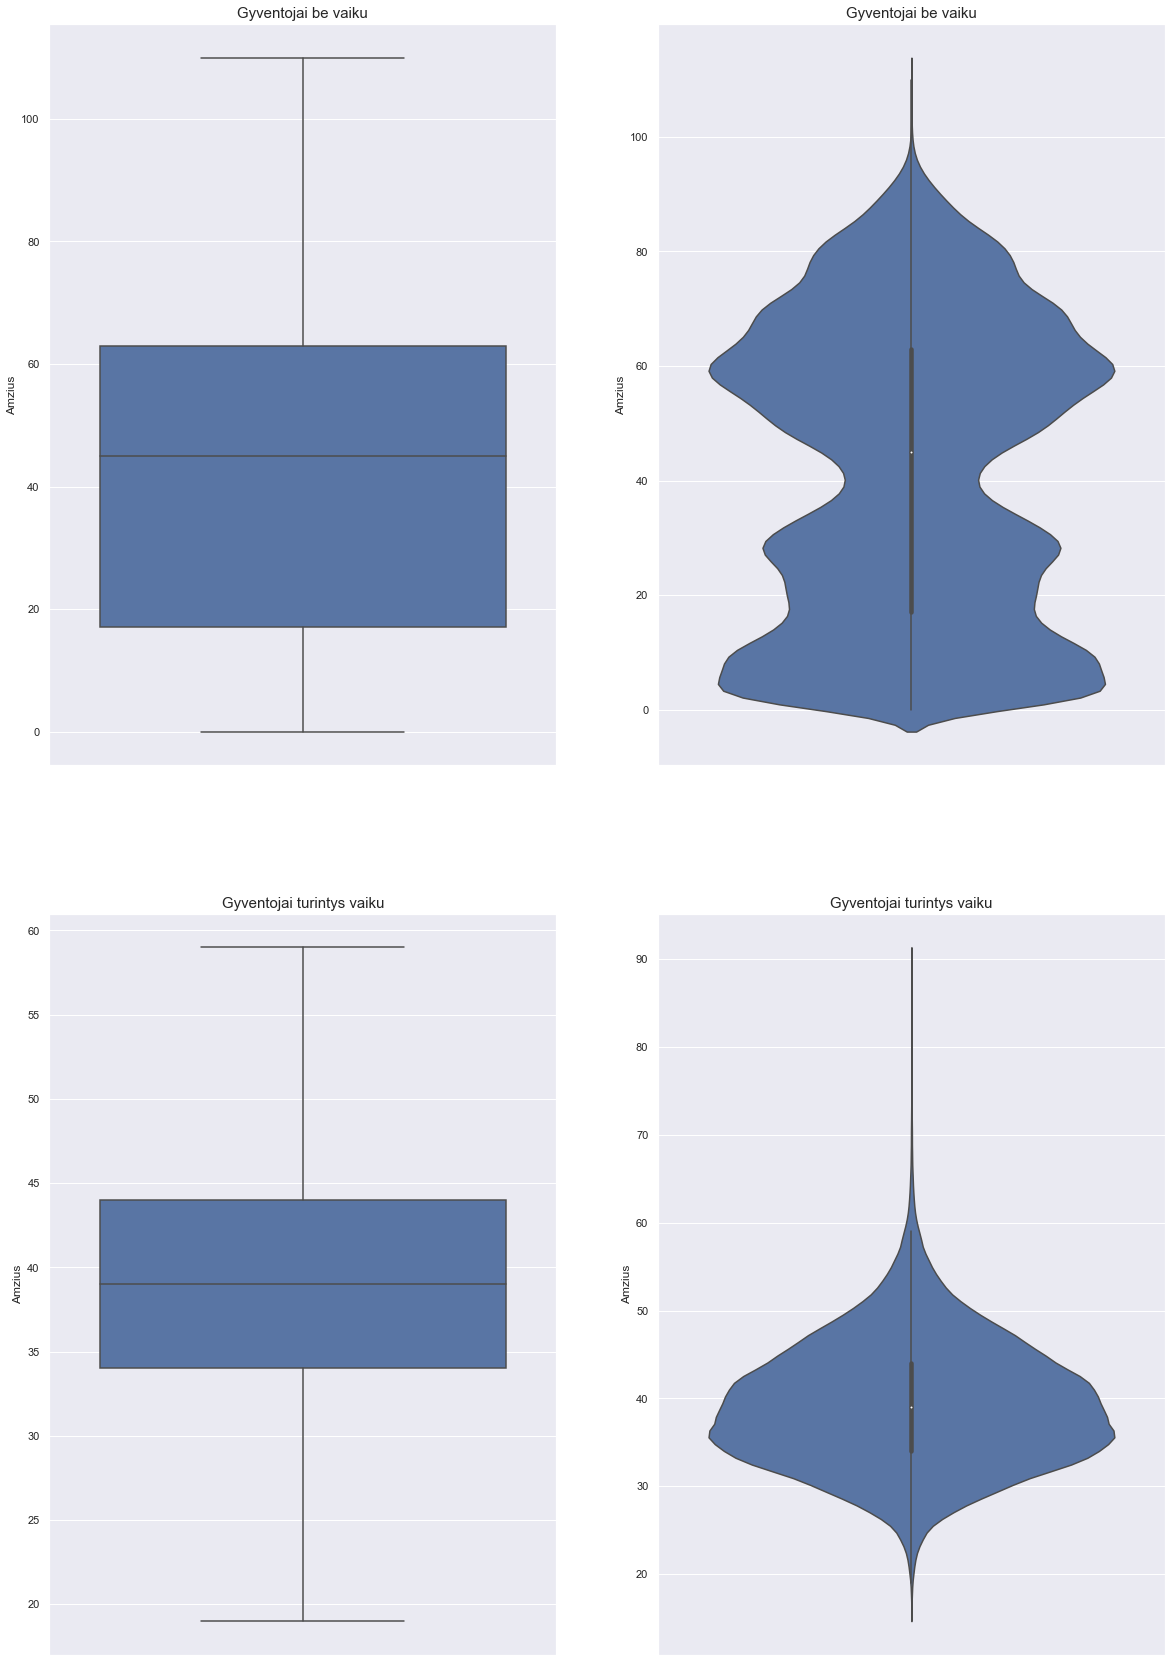

In [62]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)
ax1 = sns.boxplot(y='Amzius', data=bevaiku, )
ax1.set_title('Gyventojai be vaiku', fontsize=15)
plt.subplot(2,2,2)
ax2 = sns.violinplot(y='Amzius', data=bevaiku, ) 
ax2.set_title('Gyventojai be vaiku',fontsize=15)


plt.subplot(2,2,3)
ax3 = sns.boxplot(y='Amzius', data=suvaikais, showfliers=False )
ax3.set_title('Gyventojai turintys vaiku',fontsize=15)
plt.subplot(2,2,4)
ax4 = sns.violinplot(y='Amzius', data=suvaikais,  ) 
ax4.set_title('Gyventojai turintys vaiku',fontsize=15)



# Daugiaviakiu seimu analize 4 + vaikai

a. Where families with 4+ kids live rajonas, gatves?

b. what are their births years?

c. What natonalities are they?

In [30]:
daugvaiku = df[df['KIEK_TURI_VAIKU'] >= 4]
daugvaiku.count()

GIMIMO_METAI       1367
GIMIMO_VALSTYBE    1367
LYTIS              1367
SEIMOS_PADETIS     1367
KIEK_TURI_VAIKU    1367
SENIUNIJA          1325
GATVE              1325
Amzius             1367
dtype: int64

Text(0.5, 1.0, 'Daugiavaikes seimos 4+ Gim.Metus')

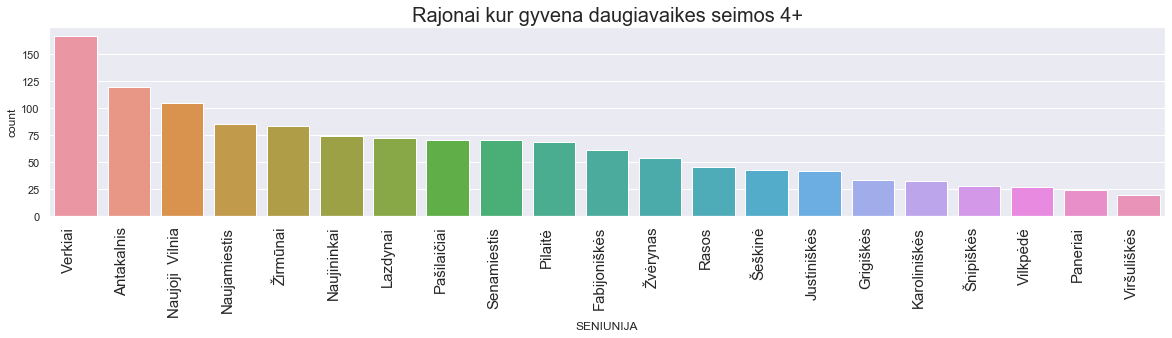

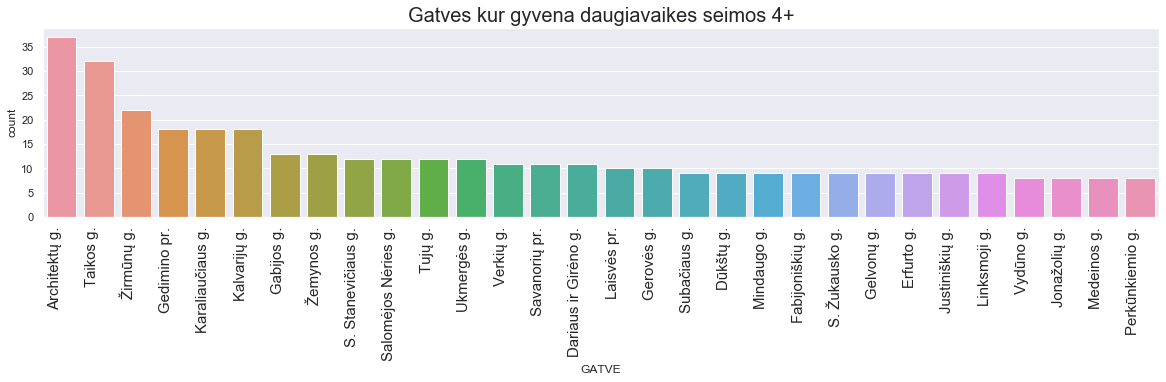

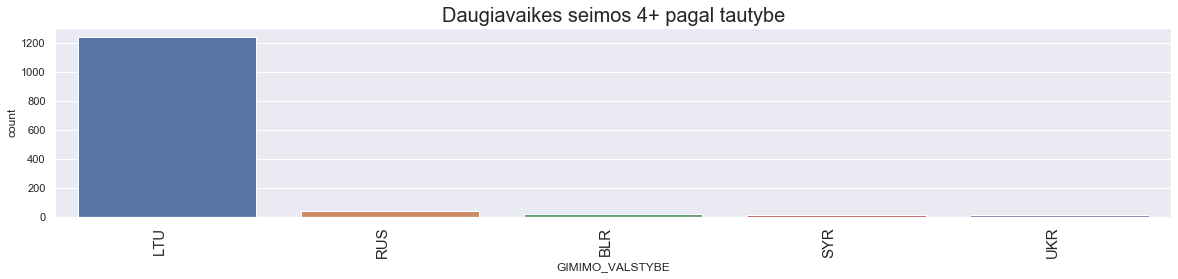

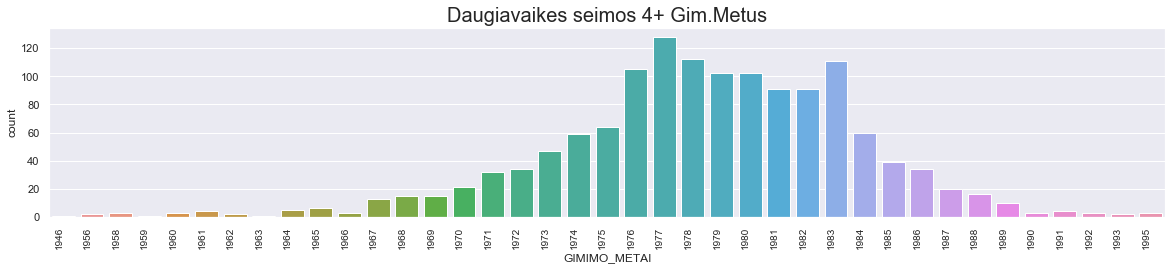

In [31]:

plt.figure(figsize=(20,16))
plt.subplot(4,1,1)
ax = sns.countplot(x='SENIUNIJA',data=daugvaiku, order=daugvaiku.SENIUNIJA.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Rajonai kur gyvena daugiavaikes seimos 4+', fontsize=20)

plt.figure(figsize=(20,16))
plt.subplot(4,1,2)
ax = sns.countplot(x='GATVE',data=daugvaiku, order=daugvaiku.GATVE.value_counts().iloc[:30].index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Gatves kur gyvena daugiavaikes seimos 4+', fontsize=20)


plt.figure(figsize=(20,16))
plt.subplot(4,1,3)
ax = sns.countplot(x='GIMIMO_VALSTYBE',data=daugvaiku, order=daugvaiku.GIMIMO_VALSTYBE.value_counts().iloc[:5].index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Daugiavaikes seimos 4+ pagal tautybe', fontsize=20)

plt.figure(figsize=(20,16))
plt.subplot(4,1,4)
ax = sns.countplot(x='GIMIMO_METAI',data=daugvaiku);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
ax.set_title('Daugiavaikes seimos 4+ Gim.Metus', fontsize=20)

# Most populated areas?

In [32]:
df['SENIUNIJA'].value_counts()

Verkiai            49359
Žirmūnai           44028
Antakalnis         39785
Pašilaičiai        39543
Fabijoniškės       38253
Naujoji  Vilnia    37372
Lazdynai           31900
Naujininkai        31407
Naujamiestis       30693
Šeškinė            29803
Justiniškės        26818
Pilaitė            26090
Karoliniškės       25770
Senamiestis        21503
Vilkpėdė           19902
Šnipiškės          16657
Viršuliškės        14177
Žvėrynas           13465
Grigiškės          11592
Rasos              11463
Paneriai           10064
Name: SENIUNIJA, dtype: int64

Text(0.5, 1.0, 'Rajonai pagal gyventoju skaiciu')

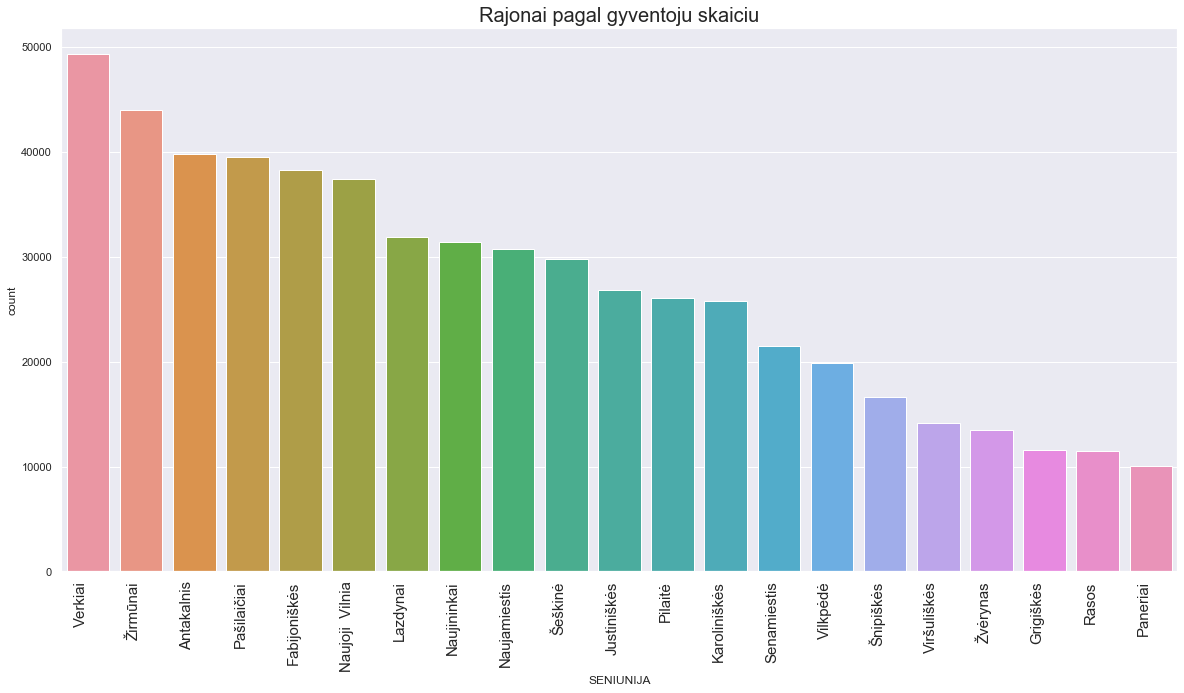

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='SENIUNIJA',data=df, order=df.SENIUNIJA.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Rajonai pagal gyventoju skaiciu', fontsize=20)

# Most populated streets?

In [34]:
df['GATVE'].value_counts()

Taikos g.                 17659
Žirmūnų g.                16920
Architektų g.             16085
Kalvarijų g.              10381
S. Stanevičiaus g.         9733
                          ...  
Taurupės g.                   1
Pakupečių g.                  1
Samių g.                      1
Rodūnios Sodų 5-oji g.        1
Kairėnės Sodų 4-oji g.        1
Name: GATVE, Length: 2301, dtype: int64

Text(0.5, 1.0, 'Top 30 Gatviu pagal gyventoju skaiciu')

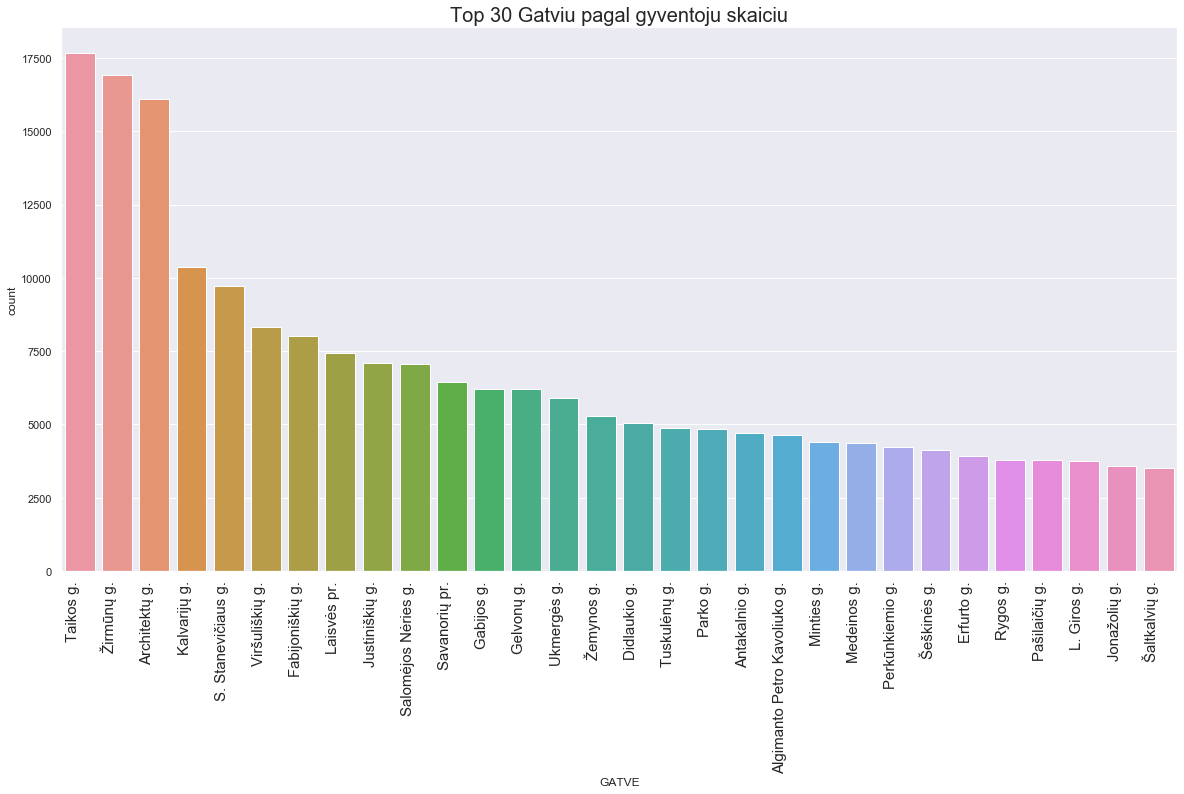

In [35]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='GATVE',data=df, order=df.GATVE.value_counts().iloc[:30].index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Top 30 Gatviu pagal gyventoju skaiciu', fontsize=20)